In [1]:
%pylab inline
from astropy.io import fits
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
gdr2 = fits.getdata('../output/GDR2_207/GDR2_207_cleaned_0.0025sampling_validation.fits')

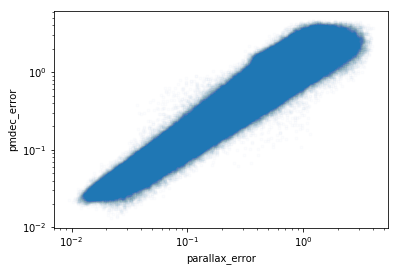

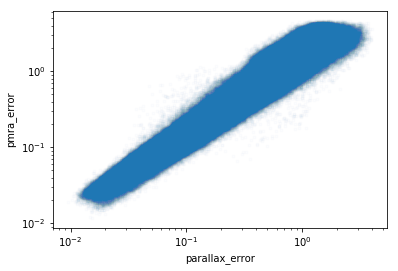

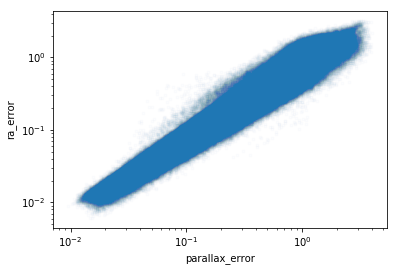

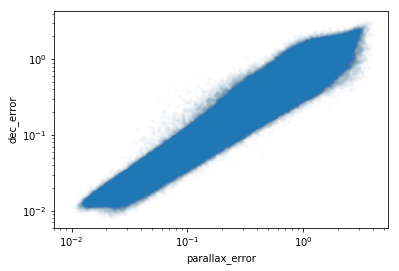

In [3]:
for item in ['pmdec_error','pmra_error','ra_error','dec_error']:
    plt.plot(gdr2.parallax_error,gdr2[item],'.', alpha = 0.01)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('parallax_error')
    plt.ylabel(item)
    plt.show()
    plt.close()

###### pmdec_error
best factor:  [1.52057756]
std before:  0.3186067948700777
std after:  0.2738725491276844


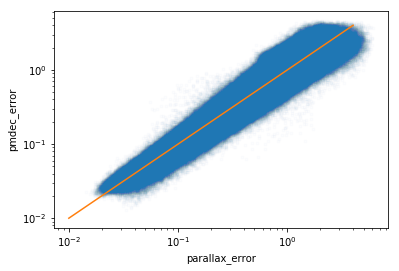

###### pmra_error
best factor:  [1.70987997]
std before:  0.3763173041838757
std after:  0.28779874539375244


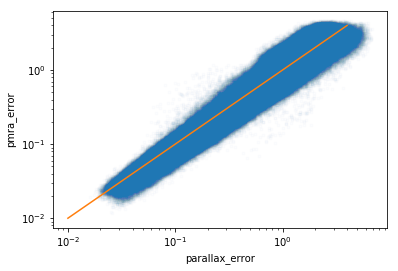

###### ra_error
best factor:  [0.81138928]
std before:  0.1378574039647949
std after:  0.11635024847631512


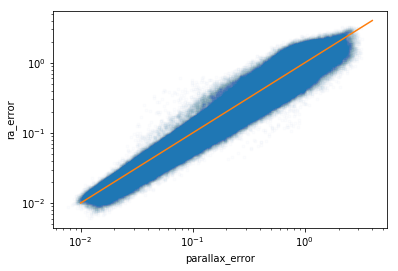

###### dec_error
best factor:  [0.75034382]
std before:  0.152765563841241
std after:  0.11486073236374274


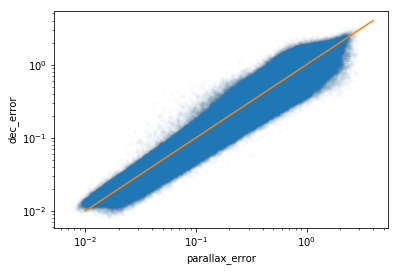

In [4]:
# fit for parallax error
def func(x,a):
    return(a*x)
for item in ['pmdec_error','pmra_error','ra_error','dec_error']:
    popt, pcov = curve_fit(func, gdr2.parallax_error, gdr2[item])
    print('######', item)
    print('best factor: ', popt)
    print('std before: ', np.std(gdr2.parallax_error-gdr2[item]))
    print('std after: ', np.std((popt*gdr2.parallax_error)-gdr2[item]))
    plt.plot(popt*gdr2.parallax_error,gdr2[item],'.', alpha = 0.01)
    plt.plot([0.01,4],[0.01,4])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('parallax_error')
    plt.ylabel(item)
    plt.show()
    plt.close()

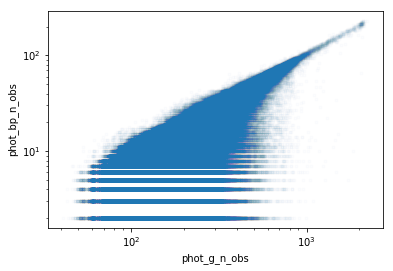

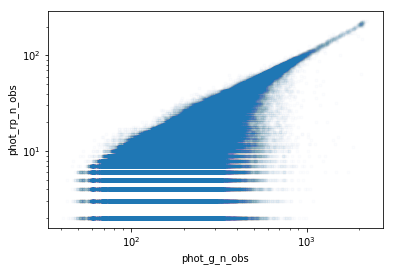

In [5]:
for item in ['phot_bp_n_obs','phot_rp_n_obs']:
    plt.plot(gdr2.phot_g_n_obs,gdr2[item],'.', alpha = 0.01)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('phot_g_n_obs')
    plt.ylabel(item)
    plt.show()
    plt.close()

###### phot_bp_n_obs
best factor:  [0.09218999]
std before:  97.08354660741688
std after:  5.397663867594944


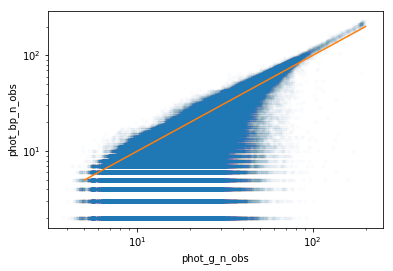

###### phot_rp_n_obs
best factor:  [0.09617749]
std before:  96.82978702536552
std after:  5.175921622096164


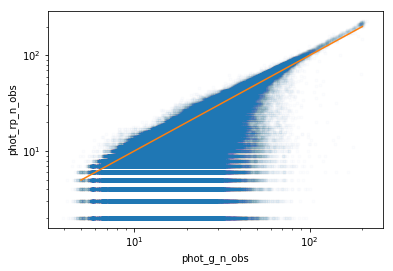

In [6]:
# fit for nobs
for item in ['phot_bp_n_obs','phot_rp_n_obs']:
    popt, pcov = curve_fit(func, gdr2.phot_g_n_obs, gdr2[item])
    print('######', item)
    print('best factor: ', popt)
    print('std before: ', np.std(gdr2.phot_g_n_obs-gdr2[item]))
    print('std after: ', np.std((popt*gdr2.phot_g_n_obs)-gdr2[item]))
    plt.plot(popt*gdr2.phot_g_n_obs,gdr2[item],'.', alpha = 0.01)
    plt.plot([5,200],[5,200])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('phot_g_n_obs')
    plt.ylabel(item)
    plt.show()
    plt.close()

In [7]:
def gmagerror(flux,fluxerror):
    """
    calculates the symmetric gmag error from fluxes, only good approximation for low values
    """
    def flux2mag(f):
        return(-2.5*np.log10(f)+25.688365)
    gp = flux2mag(flux + fluxerror)
    gm = flux2mag(flux - fluxerror)
    return(np.divide(gm-gp,2))

def bpmagerror(flux,fluxerror):
    """
    calculates the symmetric gmag error from fluxes, only good approximation for low values
    """
    def flux2mag(f):
        return(-2.5*np.log10(f)+25.351388)
    gp = flux2mag(flux + fluxerror)
    gm = flux2mag(flux - fluxerror)
    return(np.divide(gm-gp,2))

def rpmagerror(flux,fluxerror):
    """
    calculates the symmetric gmag error from fluxes, only good approximation for low values
    """
    def flux2mag(f):
        return(-2.5*np.log10(f)+24.7619)
    gp = flux2mag(flux + fluxerror)
    gm = flux2mag(flux - fluxerror)
    return(np.divide(gm-gp,2))

In [8]:
f = gdr2.phot_g_mean_flux
fe = gdr2.phot_g_mean_flux_error
ge = gmagerror(f,fe)
f = gdr2.phot_bp_mean_flux
fe = gdr2.phot_bp_mean_flux_error
be = bpmagerror(f,fe)
f = gdr2.phot_rp_mean_flux
fe = gdr2.phot_rp_mean_flux_error
re = rpmagerror(f,fe)
print(len(be))
cut = np.isnan(be)
be = be[~cut]
print(len(be))
ge = ge[~cut]
re = re[~cut]
print(len(re))
cut = np.isnan(re)
re = re[~cut]
print(len(re))
ge = ge[~cut]
be = be[~cut]

/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


2927847
2926566
2926566
2926319


/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


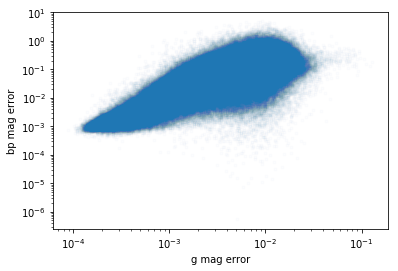

###### BP mag error
best factor:  [19.85411243]
std before:  0.0943999421697972
std after:  0.07364585289428578


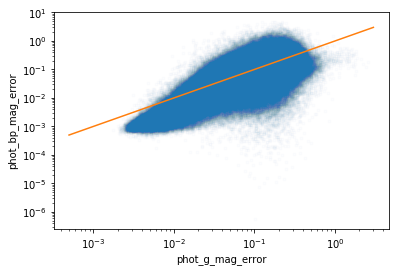

In [19]:
plt.plot(ge,be,'.', alpha = 0.01)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('g mag error')
plt.ylabel('bp mag error')
plt.show()
plt.close()
#fit for bp mag error
popt, pcov = curve_fit(func, ge, be)
print('###### BP mag error')
print('best factor: ', popt)
print('std before: ', np.std(ge-be))
print('std after: ', np.std((popt[0]*ge)-be))
plt.plot(popt[0]*ge,be,'.', alpha = 0.01)
plt.plot([5e-4,3],[5e-4,3])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('phot_g_mag_error')
plt.ylabel("phot_bp_mag_error")
plt.show()
plt.close()

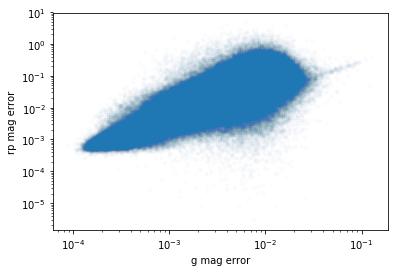

###### RP mag error
best factor:  [9.12046811]
std before:  0.046768324672269185
std after:  0.038705667267883645


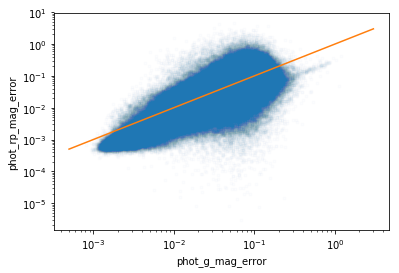

In [20]:
plt.plot(ge,re,'.', alpha = 0.01)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('g mag error')
plt.ylabel('rp mag error')
plt.show()
plt.close()
#fit for rp mag error
popt, pcov = curve_fit(func, ge, re)
print('###### RP mag error')
print('best factor: ', popt)
print('std before: ', np.std(ge-re))
print('std after: ', np.std((popt[0]*ge)-re))
plt.plot(popt[0]*ge,re,'.', alpha = 0.01)
plt.plot([5e-4,3],[5e-4,3])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('phot_g_mag_error')
plt.ylabel("phot_rp_mag_error")
plt.show()
plt.close()